In [21]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from geopandas import GeoDataFrame

In [66]:
def get_map(my_list):
    fp = r'C:\Users\hp\Downloads\india-polygon.shp'           #Indian state shape file.Put dbf,shx,shp file in same directory
    map_df = gpd.read_file(fp)
    centroid_df=pd.read_csv(r"C:\Users\hp\Downloads\district wise centroids.csv")   #Different points in a state
    validStateUT=set()
    for i in range(0,len(centroid_df)):
        validStateUT.add(centroid_df["State"][i])    
    freq={}                                         #No of tweets from each state
    maxm=0                                          #Maximunm number of tweets from any state 
    for item in my_list:                            #Loop to count no of teets from each state from given list
        if(item in freq):
            freq[item]+=1
        else:
            freq[item]=1
        maxm=max(freq[item],maxm)
    #The following part will convert the freq to the pandas dataframe    
    state=[]
    count=[]
    for key,values in freq.items():
        state.append(key)
        count.append(values)
    count_dict={'State':state,'Count':count}    
    count_df=pd.DataFrame(count_dict)                #Pandas dataframe containing state and correspoding no of tweet
    merged = map_df.set_index('st_nm').join(count_df.set_index('State'))    ##Merging file for map
    merged.fillna(0)                    ##Replacing nan value with 0
    #The folloing part will calculate no of dots in each state(No of dots is corresponding to the no of tweets from that state) 
    #Also it will find the location (longitude and latitude) where dots will be marked in map.  
    nme=[]
    long=[]
    lat=[]
    for key,value in freq.items():                     
        adjusted_value=(value*46)/maxm     ##The maximum no of dots in any state will be 46.From that we will calculate no of dots for each state.                       
        no_of_available_points=centroid_df.loc[centroid_df["State"]==key]["Longitude"].size    ##No of availabe coordinates in the district file for each state    
        if(no_of_available_points==0):
            print("There is wrong name of state/UT in input. Valid State/Ut are:")
            print(validStateUT)
            return
        num_of_row=adjusted_value/(no_of_available_points*3)                      ##No of row to be dotted on each available point in the state
        count_long=0
        count_lat=0
        for index_row in range(0,int(num_of_row)+1):          ##This loop will find the location to be dotted.
            for index_column in range(0,3):
                for key1,value1 in centroid_df.loc[centroid_df["State"]==key]["Latitude"].iteritems():
                    if(count_lat<adjusted_value):
                        lat.append(value1+index_row*0.25)
                        count_lat+=1
                for key1,value1 in centroid_df.loc[centroid_df["State"]==key]["Longitude"].iteritems():
                    if(count_long<adjusted_value):
                        long.append(value1+index_column*0.25)
                        nme.append(key)
                        count_long+=1
    dict={'State':nme,'Longitude':long,'Latitude':lat}
    df=pd.DataFrame(dict)                                 ##Convert the location values to pandas dataframe
    ##Map creation and marking
    fig,ax=plt.subplots(figsize=(16,16))         ##Can change size of map by varying figsize
    ax.set_title('Number of tweets', fontdict={'fontsize': '25', 'fontweight' : '10'})   ## Can change title or its size 
    map_df.plot(ax=ax,color="yellow",edgecolor="black",linewidth=2.0,alpha=0.1)        ##Choosing background colour,border line color and border width
    geometry = [Point(xy) for xy in zip(df['Longitude'],df['Latitude'])] 
    gdf = GeoDataFrame(df, geometry=geometry)
    merged.plot(column="Count",cmap="YlGnBu",ax=ax,edgecolor="grey",legend=True,linewidth=2.0)       ##Coloring each state according to number of tweets.cmap is the color variance.
    gdf.plot(ax=ax, marker='o', color='red', markersize=35)                                   ##Plotting the dots


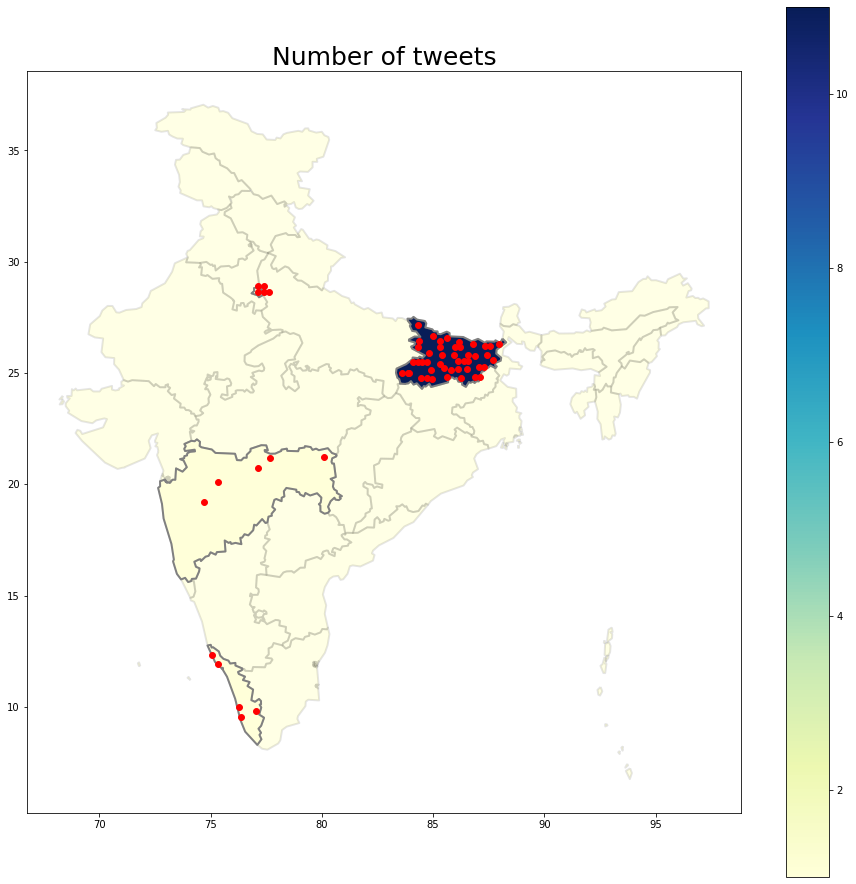

In [69]:
my_list=["Delhi","Bihar","Bihar","Bihar","Bihar","Bihar","Bihar","Bihar","Kerala","Bihar","Bihar","Bihar","Bihar","Maharashtra"]
get_map(my_list)